# Sales time series

In [1]:
# Processing the data
import numpy as np
import pandas as pd

In [23]:
# New imports

In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

## Load and explore dataset

In [4]:
df = pd.read_csv('sales_dataset.csv')

In [5]:
df.head()

,Date,TV,Radio,Banners,Sales
0,2018-01-07,13528.1,0.00,0.00,9779.80
1,2018-01-14,0.0,5349.65,2218.93,13245.19
2,2018-01-21,0.0,4235.86,2046.96,12022.66
3,2018-01-28,0.0,3562.21,0.00,8846.95
4,2018-02-04,0.0,0.00,2187.29,9797.07


In [6]:
df.isnull().sum()

Date       0
TV         0
Radio      0
Banners    0
Sales      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     200 non-null    object 
 1   TV       200 non-null    float64
 2   Radio    200 non-null    float64
 3   Banners  200 non-null    float64
 4   Sales    200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Change Date data type to work and process

df['Date'] = pd.to_datetime(df['Date'])

# Create some auxiliary variables

df['week'] = df['Date'].dt.week
df['year'] = df['Date'].dt.year
df['year_week'] = df['Date'].dt.strftime('%Y-%V')

/Users/anieto/miniconda3/envs/tda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


<AxesSubplot:xlabel='Date'>

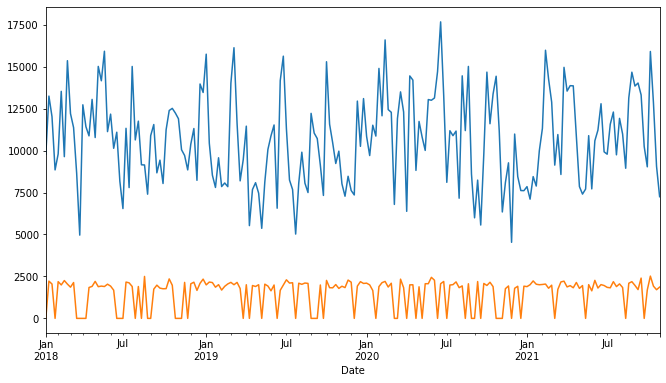

In [22]:
df.groupby('Date')['Sales'].sum().plot( y= 'Sales', figsize=(11,6))
df.groupby('Date')['Banners'].sum().plot(y='Spend', figsize=(11,6))
#df.groupby('Date')['Radio'].sum().plot(y='Radio Spend', figsize=(11,6))
#df.groupby('Date')['TV'].sum().plot(y='TV Spend', figsize=(11,6))

<AxesSubplot:xlabel='year_week'>

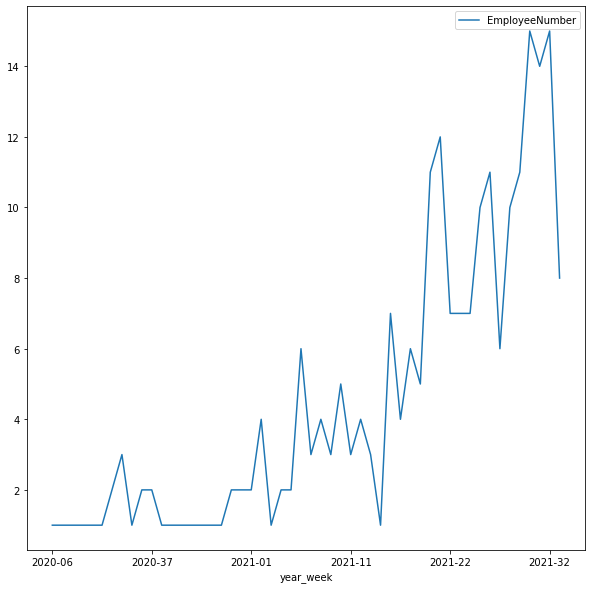

In [35]:
pato[pato['Attrition'] == 'Yes'].groupby('EmployeeNumber')[['Recived_at','year_week']].max().reset_index().groupby('year_week').count().reset_index().plot(x='year_week',y='EmployeeNumber', figsize=(10,10))

In [34]:
#headcount
pato.groupby('EmployeeNumber')[['Recived_at','year_week']].max().reset_index().groupby('year_week').count().reset_index().head()

In [6]:
rf = RandomForestClassifier(max_depth=12, 
                            max_features=11, 
                            n_estimators=180, 
                            random_state=2021, 
                            n_jobs=-1)

cat_pipe = ColumnTransformer([('ordinal_encoder', OrdinalEncoder(), categorical_attributes)],
                             remainder='passthrough')

pipe_model = Pipeline([
      ('encoder', cat_pipe),
      ('classification', rf )
    ])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    random_state=2022, 
                                                    test_size=0.2,
                                                    stratify =y)

In [10]:
pipe_model.fit(x_train, y_train)
y_pred = pipe_model.predict(x_test)

print('Accuracy Score of Random Forest Classifier is: ', metrics.accuracy_score(y_test, y_pred))
print('Recall Score of Random Forest Classifier Model is: ', metrics.recall_score(y_test, y_pred))

Accuracy Score of Random Forest Classifier is:  0.9116279069767442
Recall Score of Random Forest Classifier Model is:  0.9157894736842105


In [11]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       120
           1       0.89      0.92      0.90        95

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215



## Generate Dataset with  score column

In [14]:
hrdata["turnover_score"] = pipe_model.predict_proba(hrdata[val_cols])[:,1] # 

In [30]:
hrdata[['EmployeeNumber','turnover_score']].head(2)

,EmployeeNumber,turnover_score
0,1,0.829019
1,2,0.290120


## Save model

In [16]:
joblib.dump(pipe_model, 'clf.model')

['clf.model']

## Load Model

In [17]:
clf = joblib.load('clf.model')

### Create a record for testing

In [18]:
hrdata2 = pd.read_csv('HR_Employee_Attrition.csv')

In [19]:
collaborator_rn = np.random.choice(range(1,hrdata2.shape[1]))

In [20]:
collaborator = pd.DataFrame(hrdata2.iloc[collaborator_rn,:]).T

In [21]:
collaborator.drop(columns=['EmployeeCount', 
                           'Attrition',
                           'JobLevel', 
                           'Over18',
                           'StandardHours', 
                           'TotalWorkingYears'], inplace=True)

### Generate json example using original dataset

In [22]:
collaborator.to_json(orient="records")

'[{"Age":39,"BusinessTravel":"Travel_Rarely","DailyRate":895,"Department":"Sales","DistanceFromHome":5,"Education":3,"EducationField":"Technical Degree","EmployeeNumber":42,"EnvironmentSatisfaction":4,"Gender":"Male","HourlyRate":56,"JobInvolvement":3,"JobRole":"Sales Representative","JobSatisfaction":4,"MaritalStatus":"Married","MonthlyIncome":2086,"MonthlyRate":3335,"NumCompaniesWorked":3,"OverTime":"No","PercentSalaryHike":14,"PerformanceRating":3,"RelationshipSatisfaction":3,"StockOptionLevel":1,"TrainingTimesLastYear":6,"WorkLifeBalance":4,"YearsAtCompany":1,"YearsInCurrentRole":0,"YearsSinceLastPromotion":0,"YearsWithCurrManager":0}]'

In [23]:
request = collaborator.to_json(orient="records")

### Create a new json example, not in the original dataset, for testing

In [24]:
example = {"Age":37,  
           "BusinessTravel":"Travel_Frequently",  
           "DailyRate":29, 
           "Department":"Research & Development", 
           "DistanceFromHome":12, 
           "Education":3,  
           "EducationField":"Life Sciences",  
           "EmployeeNumber":23333999,  
           "EnvironmentSatisfaction":13,  
           "Gender":"Male",  
           "HourlyRate":61,  
           "JobInvolvement":2,  
           "JobRole":"Research Scientist",  
           "JobSatisfaction":2,  
           "MaritalStatus":"Married",  
           "MonthlyIncome":5130,  
           "MonthlyRate":24907, 
           "NumCompaniesWorked":1, 
           "OverTime":"No", 
           "PercentSalaryHike":23, 
           "PerformanceRating":4, 
           "RelationshipSatisfaction":4,  
           "StockOptionLevel":1,  
           "TrainingTimesLastYear":3,  
           "WorkLifeBalance":3,  
           "YearsAtCompany":10,  
           "YearsInCurrentRole":1,  
           "YearsSinceLastPromotion":1,  
           "YearsWithCurrManager":1}

In [25]:
new_example = json.dumps(example)

In [26]:
new_example

'{"Age": 37, "BusinessTravel": "Travel_Frequently", "DailyRate": 29, "Department": "Research & Development", "DistanceFromHome": 12, "Education": 3, "EducationField": "Life Sciences", "EmployeeNumber": 23333999, "EnvironmentSatisfaction": 13, "Gender": "Male", "HourlyRate": 61, "JobInvolvement": 2, "JobRole": "Research Scientist", "JobSatisfaction": 2, "MaritalStatus": "Married", "MonthlyIncome": 5130, "MonthlyRate": 24907, "NumCompaniesWorked": 1, "OverTime": "No", "PercentSalaryHike": 23, "PerformanceRating": 4, "RelationshipSatisfaction": 4, "StockOptionLevel": 1, "TrainingTimesLastYear": 3, "WorkLifeBalance": 3, "YearsAtCompany": 10, "YearsInCurrentRole": 1, "YearsSinceLastPromotion": 1, "YearsWithCurrManager": 1}'

### Use the example from the dataset or the new example to test prediction

In [27]:
# Use an existing example in the dataset:
#data = json.loads(request)

# Use the new example:
data = json.loads(new_example)

In [28]:
def hr_predict(request):
    df = pd.DataFrame([request])
    ID = df['EmployeeNumber'][0]
    df.drop(columns=['EmployeeNumber'], inplace=True)
    prediction = clf.predict_proba(df)
    output = {'ID': ID , 'prediction': list(prediction[:,1])[0]}
    return output

In [29]:
hr_predict(data)

{'ID': 23333999, 'prediction': 0.3669442821144328}

> This is the prediction output for a new input data corresponding to a new collaborator.

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [194]:
#x-axis ranges from -3 and 3 with .001 steps
x = np.arange(-100, 200, 0.01)

In [189]:
salarios = []
for x in range(0,100):
    y = np.random.randint(x,100)
    salarios.append(y)

In [196]:
np.std(salarios), np.mean(salarios)

(22.7631192941565, 74.02)

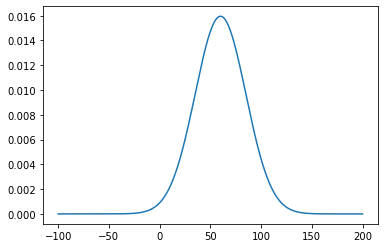

In [195]:
#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 60, 25))

In [202]:
np.random.normal(60,45, 40)

array([ 35.32412908,  34.28136809,  68.4899853 ,  65.61791587,
        52.09974564,  90.82702045,  65.43858196, 131.2097908 ,
        19.29668874,  16.8284796 ,  65.02296684, 139.97403351,
        34.66273039,  48.54015002,  60.44744058,   7.45269612,
       119.0378623 ,  69.68614471,  66.33623367,  92.57620424,
        57.51260943,  14.05219619,  62.23796653,  34.43376589,
        54.53321617, 129.21936003,  -6.98841857, 111.71139628,
        97.27564651, 104.4519465 ,  35.47009138,  -9.19948819,
        28.01563852, 121.03260823, 126.26557303, 118.09327219,
       100.64989478,  41.61403101,  35.30874544, 111.7060152 ])

In [201]:
np.std([ 77.00078014,  80.89514642,  22.80573242,  74.2405958 ,
       123.43283089,   85.86467334, 113.02184221,
        70.52484155,  56.3850444 , 104.55656085,
        41.47505555,  49.70727112, 
        67.7062904 ,  85.78149146,  72.88415975,  97.72377072])

25.410455309317385